In [23]:
import os
import numpy as np
import perceval as pcvl
from time import time
## Use the symbolic skin for display
from perceval.rendering import DisplayConfig, SymbSkin
DisplayConfig.select_skin(SymbSkin)

print('perceval ver:',pcvl.__version__)
#token = os.environ.get('MY_QUANDELA_TOKEN')
#assert token!=None
#pcvl.save_token(token)

perceval ver: 0.12.0


In [28]:
# define circuit 1 
nq=2
circuit= pcvl.Circuit(2*nq) 
proc = pcvl.Processor("SLOS", circuit)
for iq in range(2*nq):
    proc.add(iq,pcvl.PS(np.pi+iq/5.))

'''
t_del=3
proc.add(0,pcvl.PS(np.pi))
proc.add(1,pcvl.BS())
for iq in range(2*nq):
    proc.add(iq,pcvl.TD(t_del))
'''


'\nt_del=3\nproc.add(0,pcvl.PS(np.pi))\nproc.add(1,pcvl.BS())\nfor iq in range(2*nq):\n    proc.add(iq,pcvl.TD(t_del))\n'


|1,0,1,0>


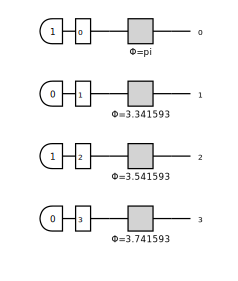

In [25]:
# Set up input state
inpStr='10'*nq
print()
inpState='|'+','.join(inpStr) +'>'
print(inpState)
proc.with_input(pcvl.BasicState(inpState))
pcvl.pdisplay(proc)

In [26]:
# Use the processor with algorithms : 1q: 0.2sec, 2q: 31 sec
sampler = pcvl.algorithm.Sampler(proc)
T0=time()
job = sampler.sample_count(10)  # 
print('nq=%d. elaT=%.1f sec'%(nq,time()-T0))

nq=2. elaT=0.0 sec


In [27]:
print(job)
results = job['results']
for k,v in results.items():
    print(k,v)

{'results': <exqalibur.BSCount object at 0x7f68b18d6630>, 'physical_perf': 1, 'logical_perf': 0.9999999999999998}
|1,0,1,0> 10
